In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

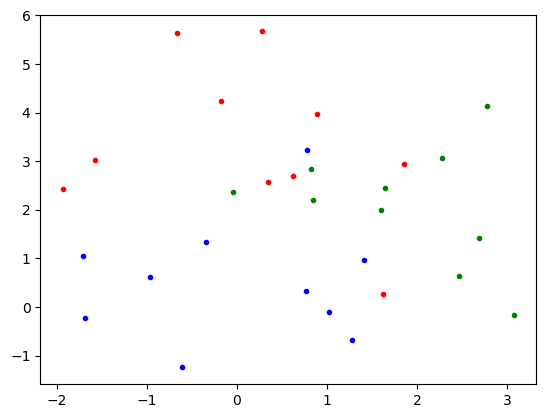

In [2]:
inp0 = np.array([0, 0]) + np.random.randn(10, 2)
inp1 = np.array([0, 3]) + np.random.randn(10, 2)
inp2 = np.array([2, 2]) + np.random.randn(10, 2)

inp = np.concatenate([inp0, inp1, inp2], axis = 0)

lab = np.array([0] * 10 + [1] * 10 + [2] * 10)

ind = np.random.permutation(30)
inp = inp[ind, :]
lab = lab[ind]

nExamples, nFeatures = np.shape(inp)

nLab = np.max(lab) + 1

# Augment points with bias
inp = np.concatenate([np.ones((nExamples, 1)), inp], axis = 1)

plt.plot(inp[lab == 0, 1], inp[lab == 0, 2], "b.")
plt.plot(inp[lab == 1, 1], inp[lab == 1, 2], "r.")
plt.plot(inp[lab == 2, 1], inp[lab == 2, 2], "g.")

In [3]:
def multiClassPerceptron(x, y, W, step):
    # Sign function
    perceptronOutput = np.argmax(W.dot(x))

    # Perceptron made a mistake
    if perceptronOutput != y:

        # Update the perceptron
        W[y, :] += step * x
        W[perceptronOutput, :] -= step * x

        return 1
    
    return 0

In [4]:
def epoch(inp, lab, W, step = 1):
    mistakes = 0
    
    for x, y in zip(inp, lab):
        mistakes += multiClassPerceptron(x, y, W, step)

    print("Mistakes: %d" % mistakes)

In [5]:
def multiClassClassifier(inp, W):
    predictedLabs = []

    for x in inp:
        perceptronOutput = np.argmax(W.dot(x))
        predictedLabs.append(perceptronOutput)
    
    predictedLabs = np.array(predictedLabs)

    return predictedLabs

In [6]:
def evaluateAccuracy(predictedLabs, knownLabs):
    acc = np.mean(predictedLabs == knownLabs)

    return acc

Epoch 1
Mistakes: 14
Accuracy: 0.633333

Epoch 2
Mistakes: 14
Accuracy: 0.633333

Epoch 3
Mistakes: 14
Accuracy: 0.500000

Epoch 4
Mistakes: 13
Accuracy: 0.766667

Epoch 5
Mistakes: 12
Accuracy: 0.566667

Epoch 6
Mistakes: 10
Accuracy: 0.733333

Epoch 7
Mistakes: 11
Accuracy: 0.733333

Epoch 8
Mistakes: 11
Accuracy: 0.600000

Epoch 9
Mistakes: 12
Accuracy: 0.800000

Epoch 10
Mistakes: 11
Accuracy: 0.766667

Epoch 11
Mistakes: 11
Accuracy: 0.766667

Epoch 12
Mistakes: 10
Accuracy: 0.766667

Epoch 13
Mistakes: 10
Accuracy: 0.766667

Epoch 14
Mistakes: 10
Accuracy: 0.800000

Epoch 15
Mistakes: 8
Accuracy: 0.800000

Epoch 16
Mistakes: 12
Accuracy: 0.700000

Epoch 17
Mistakes: 10
Accuracy: 0.766667

Epoch 18
Mistakes: 11
Accuracy: 0.800000

Epoch 19
Mistakes: 11
Accuracy: 0.800000

Epoch 20
Mistakes: 10
Accuracy: 0.800000

Epoch 21
Mistakes: 8
Accuracy: 0.733333

Epoch 22
Mistakes: 10
Accuracy: 0.800000

Epoch 23
Mistakes: 11
Accuracy: 0.766667

Epoch 24
Mistakes: 8
Accuracy: 0.766667

Epoc

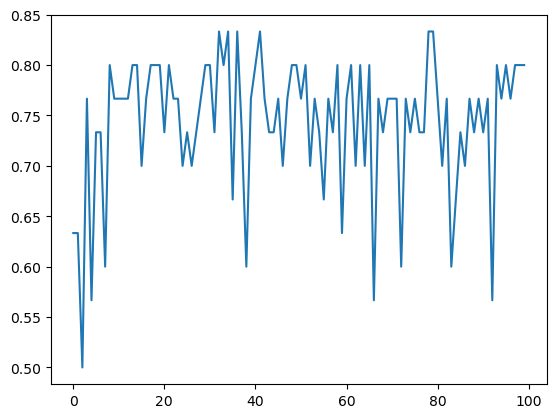

In [7]:
# Algorithm
W = np.zeros((nLab, nFeatures + 1))

step = 1

accuracies = []

for e in range(100):
    print("Epoch %d" % (e + 1))

    epoch(inp, lab, W, step)
    predictedLabs = multiClassClassifier(inp, W)
    acc = evaluateAccuracy(predictedLabs, lab)

    print("Accuracy: %f\n" % acc)

    accuracies.append(acc)

plt.plot(range(100), accuracies)